In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
def load_data(dirname, filename):
    currdir = os.getcwd()
    datadir = os.path.abspath(os.path.join(currdir, dirname))
    return os.path.abspath(os.path.join(datadir, filename))

## Get data
- get FG of retained players
- get list of retained players

In [3]:
dirname = 'outputs/data/'
filename = 'players-retained-fg.csv'

df_fg = pd.read_csv(load_data(dirname, filename))

In [4]:
df_fg

,Unnamed: 0,team,opponent,made,x,y,num,player,points,shot_type,date,venue,made_points
0,0,NU,UST,0,8,3,9,J. Clemente,2,jump shot,2018.09.08,MOA,0
1,1,NU,UST,1,0,2,10,I. Gaye,2,dunk,2018.09.08,MOA,2
2,2,NU,UST,1,-1,16,8,A. Joson,2,jump shot,2018.09.08,MOA,2
3,3,NU,UST,0,4,8,1,D. Ildefonso,2,jump shot,2018.09.08,MOA,0
4,4,NU,UST,0,62,43,1,D. Ildefonso,3,jump shot,2018.09.08,MOA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7605,ADU,FEU,1,13,5,4,C. Catapusan,2,jump shot,2018.11.18,MOA,2
7101,7606,ADU,FEU,1,-34,11,7,J. Lastimosa,2,jump shot,2018.11.18,MOA,2
7102,7607,ADU,FEU,0,4,3,11,J. Espeleta,2,jump shot,2018.11.18,MOA,0
7103,7608,ADU,FEU,0,-34,-12,7,J. Lastimosa,3,jump shot,2018.11.18,MOA,0


In [5]:
players = pd.read_csv(load_data(dirname, 'players-retained-sorted.csv'))

In [6]:
players

,p_id_retained,player,team,fg,fga,points
0,0,A. Pasaol,UE,125,294,273
1,1,A. Melecio,DLSU,78,203,188
2,2,R. Subido,UST,62,197,166
3,3,D. Ildefonso,NU,80,195,183
4,4,J. Ahanmisi,ADU,86,194,212
...,...,...,...,...,...,...
77,77,F. Jaboneta,UP,10,31,23
78,78,I. Batalier,UST,9,31,20
79,79,C. Vito,UP,14,30,31
80,80,S. Akomo,UST,15,28,30


## Draw court

In [7]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 46cm so it has a radius of 23cm, which is a value
    # 2.3 in our coordinate system
    hoop = Circle((0, 0), radius=2.3, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-9, -2.3), 18, -0.1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=4.9m, height=5.8m
    outer_box = Rectangle((-24.45, -14.3), 49, 58, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=3.6ft, height=5.8ft
    inner_box = Rectangle((-18, -14.3), 36, 58, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 43.7), 36, 36, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 43.7), 36, 36, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 25, 25, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 2.68m long before they begin to arc
    corner_three_a = Rectangle((-66, -14.3), 0, 28.8, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((66, -14.3), 0, 28.8, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 6.75m away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 135, 135, theta1=12, theta2=168, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 125.7), 36, 36, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 125.7), 12, 12, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [
        hoop,
        backboard,
        outer_box,
        inner_box,
        top_free_throw,
        bottom_free_throw,
        restricted,
        corner_three_a,
        corner_three_b,
        three_arc,
        center_outer_arc,
        center_inner_arc
    ]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-75, -14.3), 150, 140, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

## Show shot chart of shooter

In [8]:
def show_shot_chart(shooter, title="shot chart"):

    plt.figure(figsize=(12,11))
    plt.scatter(shooter.x, shooter.y, c='green', s=3)

    draw_court(outer_lines=True)

    plt.xlim(-80,80)
    plt.ylim(-20, 140)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor('#ffffff')
    plt.gca().set_title(title)

    plt.show()

## Player location and KDE

In [9]:
def get_locations(df):
    # each row of the array represents the x,y location of the FG (FG x 2 array)
    return np.vstack([df.x, df.y]).T


def get_kde_court(locs, xy, **kde_options):
    kde = KernelDensity(bandwidth=kde_options['bandwidth'], kernel=kde_options['kernel']).fit(locs)    
    return np.exp(kde.score_samples(xy))

## Generate court grid

In [10]:
def generate_xy_grids(xrange, yrange):
    x = np.arange(xrange[0], xrange[1], xrange[2])
    y = np.arange(yrange[0], yrange[1], yrange[2])

    return np.meshgrid(x, y)

## EB estimate
- prior distribution includes:
    - nearby cells
        - w/in 2 cells if distance < 7m
        - linearly increases beyond that
    - equidistant cells
        - within 50cm of same distance from basket if distance < 7m
        - linearly increases beyond that

### Initialize grids

In [11]:
xx,yy = generate_xy_grids((-75,75,5), (-15,125,5))    #xx = array of x-coordinates; yy = array of y-coordinates
grid_y, grid_x = xx.shape                             # gridy = number of rows = cells along sideline (y); gridx = number of cols = cells along baseline (x);

grid_fga = np.empty(xx.shape)
grid_fg = np.empty(xx.shape)
grid_pts = np.empty(xx.shape)
grid_ppa = np.empty(xx.shape)
grid_dist = np.zeros(xx.shape)

### Utility functions

In [12]:
def get_dist(y,x):
    '''x and y are indices not distances'''
    basket = np.array([0,0])
    return np.linalg.norm(np.array([xx[y][x] + 2.5, yy[y][x] + 2.5]) - basket).round(4)

        
def get_equidistant_cells(y, x, grid_dist=grid_dist):
    
    dist = get_dist(y,x)
    grid_dist2 = grid_dist == dist
    
    if dist >= 70:
        grid_dist3 = grid_dist >= (get_dist(y,x) - (0.07 * dist))
        grid_dist4 = grid_dist < (get_dist(y,x) + (0.07 * dist))
    else:    
        grid_dist3 = grid_dist >= (get_dist(y,x) - 2.5)
        grid_dist4 = grid_dist < (get_dist(y,x) + 2.5)
        
    grid_dist5 = grid_dist3 & grid_dist4
    grid_dist6 = grid_dist2 | grid_dist5
    
    return grid_dist6


def get_nearby_cells(y, x, grid_dist=grid_dist):
    
    dist = get_dist(y,x)
    dist_add = int((dist/50) - 0.6)
    grid_nearby = np.full(grid_dist.shape, False)
    
    if dist < 80:
        for row in range(y-2, y+3):
            for col in range(x-2, x+3):
                if (row>=0 and row<=27) and (col>=0 and col<=29):
                    grid_nearby[row][col] = True
    else:
        for row in range(y-(2+dist_add), y+(3+dist_add)):
            for col in range(x-(2+dist_add), x+(3+dist_add)):
                if (row>=0 and row<=27) and (col>=0 and col<=29):
                    grid_nearby[row][col] = True
    
    return grid_nearby


def get_prior_with_cell(y, x, grid_dist):
    
    grid_equid = get_equidistant_cells(y, x, grid_dist=grid_dist)
    grid_nearby = get_nearby_cells(y, x, grid_dist=grid_dist)
    
    grid_prior = grid_equid | grid_nearby
    grid_prior_y, grid_prior_x = np.where(grid_prior == True)
    grid_prior_index = np.vstack([grid_prior_y.ravel(), grid_prior_x.ravel()]).T
    
    return {'prior': grid_prior, 'prior_index': grid_prior_index}


def get_prior_only(y, x, grid_dist):
    
    grid_equid = get_equidistant_cells(y, x, grid_dist=grid_dist)
    grid_nearby = get_nearby_cells(y, x, grid_dist=grid_dist)
    
    grid_prior = grid_equid | grid_nearby
    grid_prior[y][x] = False
    grid_prior_y, grid_prior_x = np.where(grid_prior == True)
    grid_prior_index = np.vstack([grid_prior_y.ravel(), grid_prior_x.ravel()]).T
    
    return {'prior': grid_prior, 'prior_index': grid_prior_index}

### Fill grids

In [13]:
for y in range(0, grid_y):
    for x in range(0, grid_x):
        fga = df_fg[(df_fg.x.isin(range(xx[y][x],xx[y][x] + 5))) & (df_fg.y.isin(range(yy[y][x],yy[y][x] + 5)))]
        fg = df_fg[(df_fg.x.isin(range(xx[y][x],xx[y][x] + 5))) & (df_fg.y.isin(range(yy[y][x],yy[y][x] + 5))) & (df_fg.made==1)]
        pts = fg.made_points.sum()
        if len(fga) > 0:
            ppa = pts/len(fga)
        else:
            ppa = 0
        
        grid_fga[y][x] = len(fga)
        grid_fg[y][x] = len(fg)
        grid_pts[y][x] = pts
        grid_ppa[y][x] = ppa


for y in range(0, grid_y):
    for x in range(0, grid_x):
        dist = get_dist(y,x)
        grid_dist[y][x] = dist

### Show grids

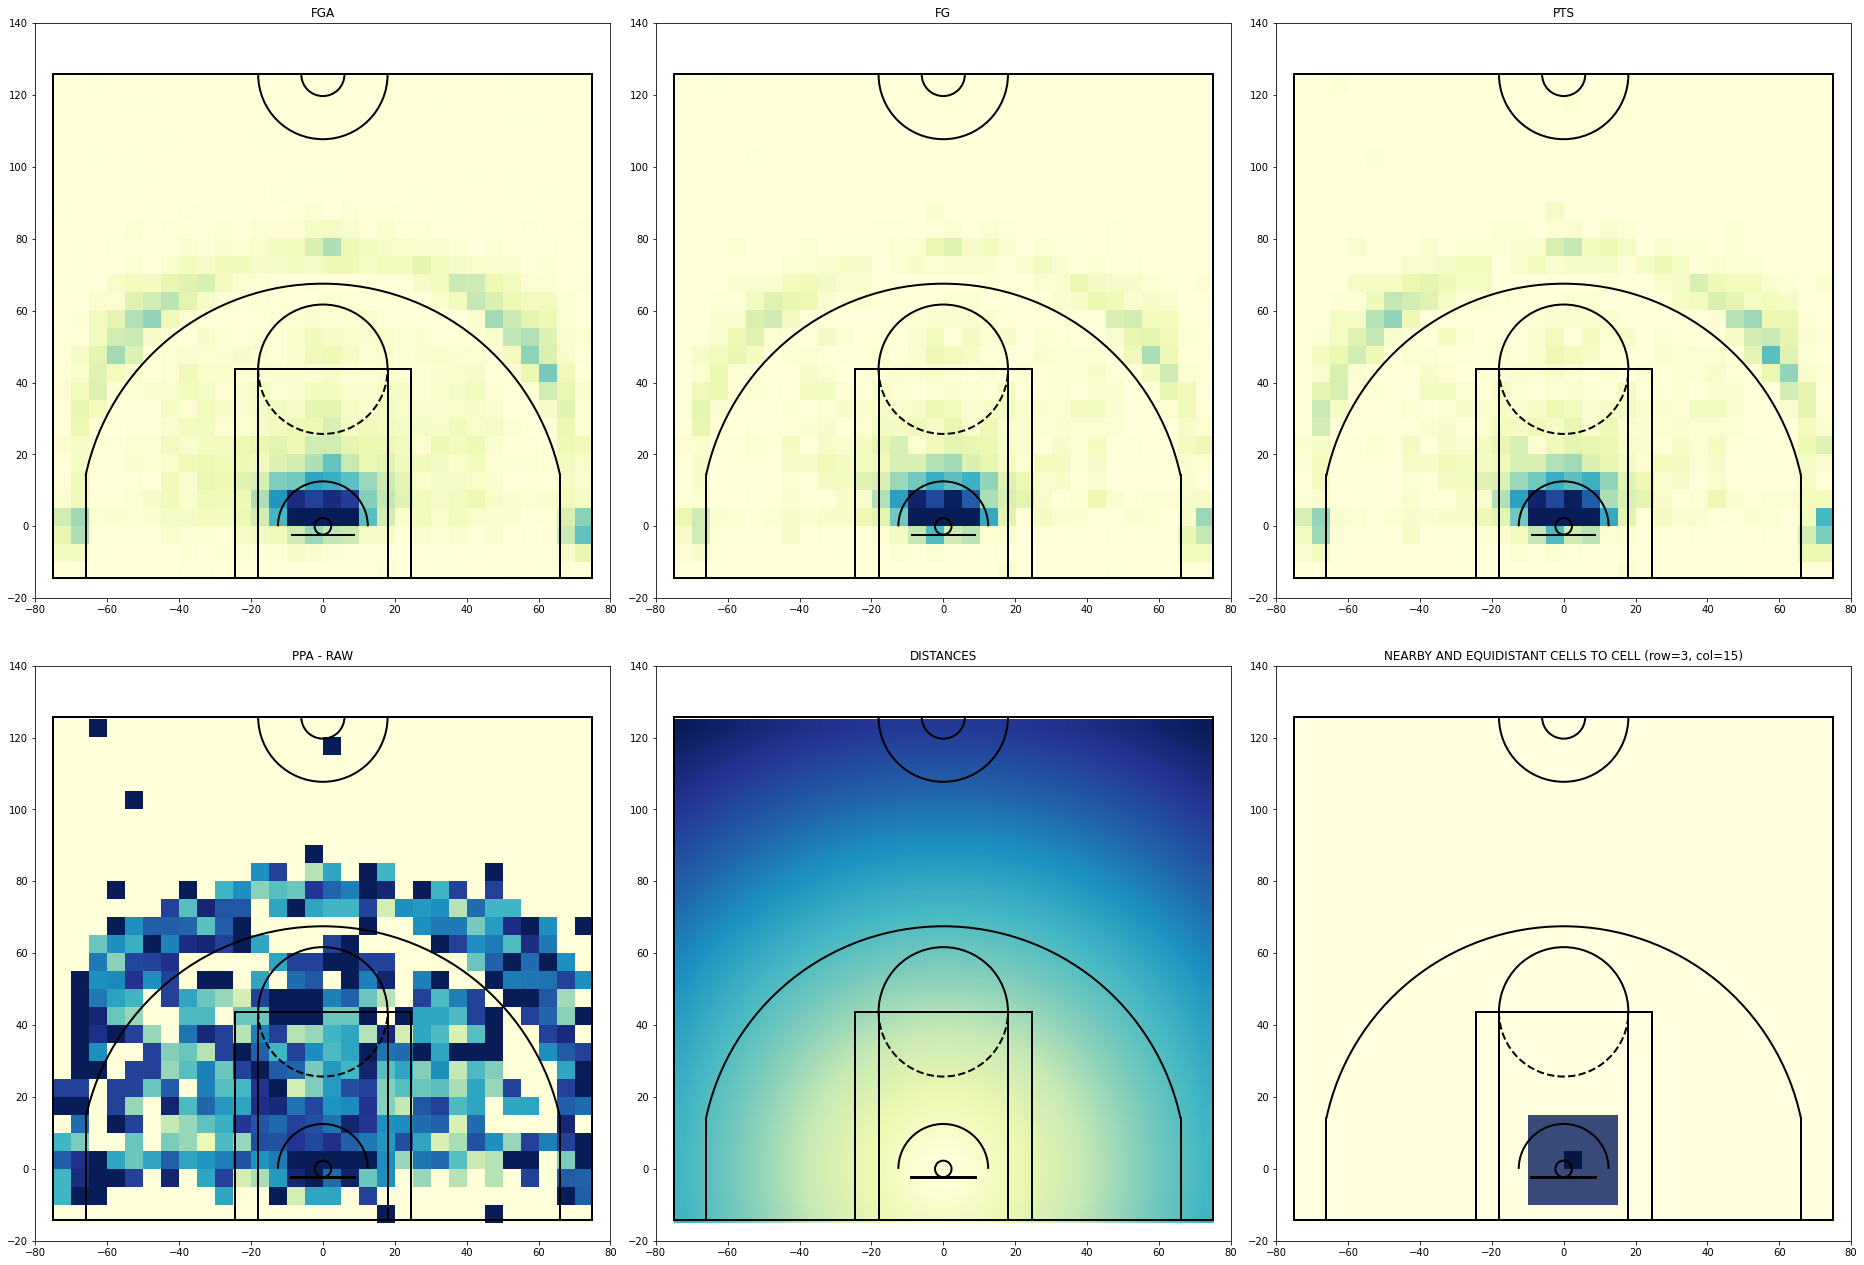

In [14]:
yi,xi = 3,15

shot = np.zeros(xx.shape)
shot[yi][xi] = 10000
    
prior = get_prior_with_cell(yi, xi, grid_dist=grid_dist)

fx, axs = plt.subplots(2,3,figsize=(26,18))
fx.set_tight_layout(True)

plt.subplot(2,3,1)
plt.imshow(grid_fga, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=140, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('FGA'.format(1))

plt.subplot(2,3,2)
plt.imshow(grid_fg, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=70, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('FG'.format(2))

plt.subplot(2,3,3)
plt.imshow(grid_pts, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=140, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PTS'.format(3))

plt.subplot(2,3,4)
plt.imshow(grid_ppa, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA - RAW'.format(4))

plt.subplot(2,3,5)
plt.imshow(grid_dist, cmap=plt.cm.YlGnBu, alpha=1.0, interpolation='bilinear', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('DISTANCES'.format(5))

plt.subplot(2,3,6)
plt.imshow(prior['prior'], cmap=plt.cm.YlGnBu, alpha=1.0, interpolation='none', extent=(-75,75,-15,125), origin='lower')
plt.imshow(shot, cmap=plt.cm.binary, alpha=0.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('NEARBY AND EQUIDISTANT CELLS TO CELL (row={}, col={})'.format(yi, xi).format(6))

plt.show()
plt.close()

### EB estimated PPA

24


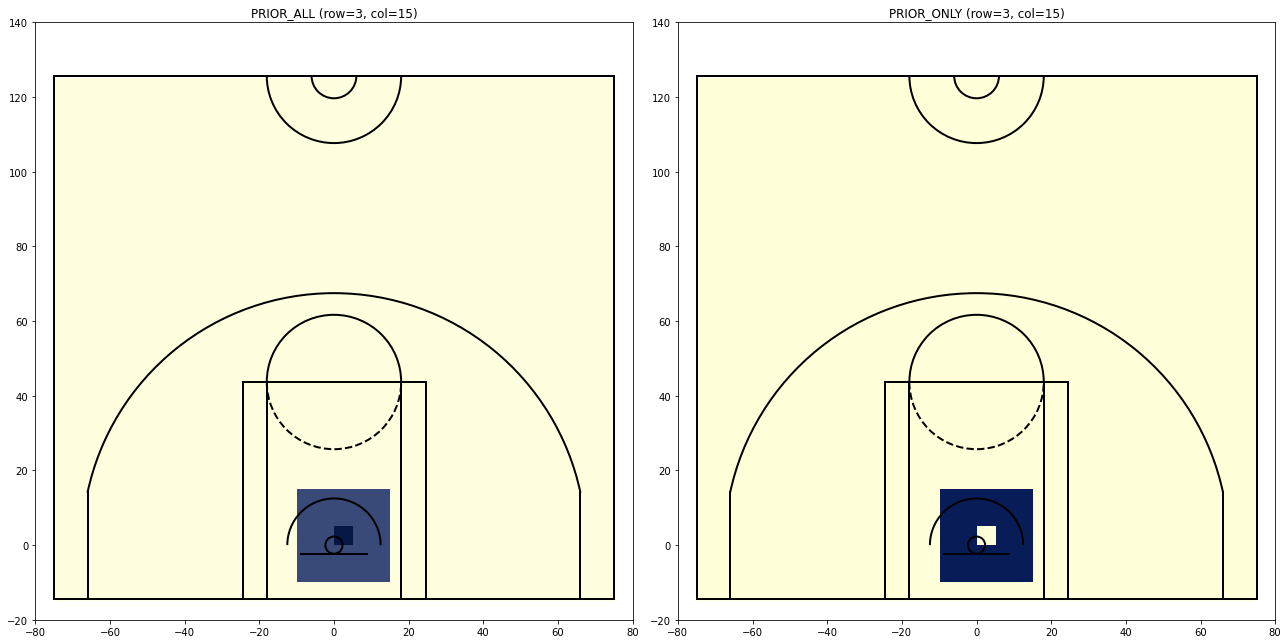

In [57]:
yii,xii = 3,15

shot = np.zeros(xx.shape)
shot[yii][xii] = 10000
    
prior_all = get_prior_with_cell(yii, xii, grid_dist=grid_dist)
prior_only = get_prior_only(yii, xii, grid_dist=grid_dist)

print(len(prior_only['prior_index']))

fx1, axs1 = plt.subplots(1,2,figsize=(18,16))
fx1.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(prior_all['prior'], cmap=plt.cm.YlGnBu, alpha=1.0, interpolation='none', extent=(-75,75,-15,125), origin='lower')
plt.imshow(shot, cmap=plt.cm.binary, alpha=0.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PRIOR_ALL (row={}, col={})'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(prior_only['prior'], cmap=plt.cm.YlGnBu, alpha=1.0, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PRIOR_ONLY (row={}, col={})'.format(yi, xi).format(2))


plt.show()
plt.close()

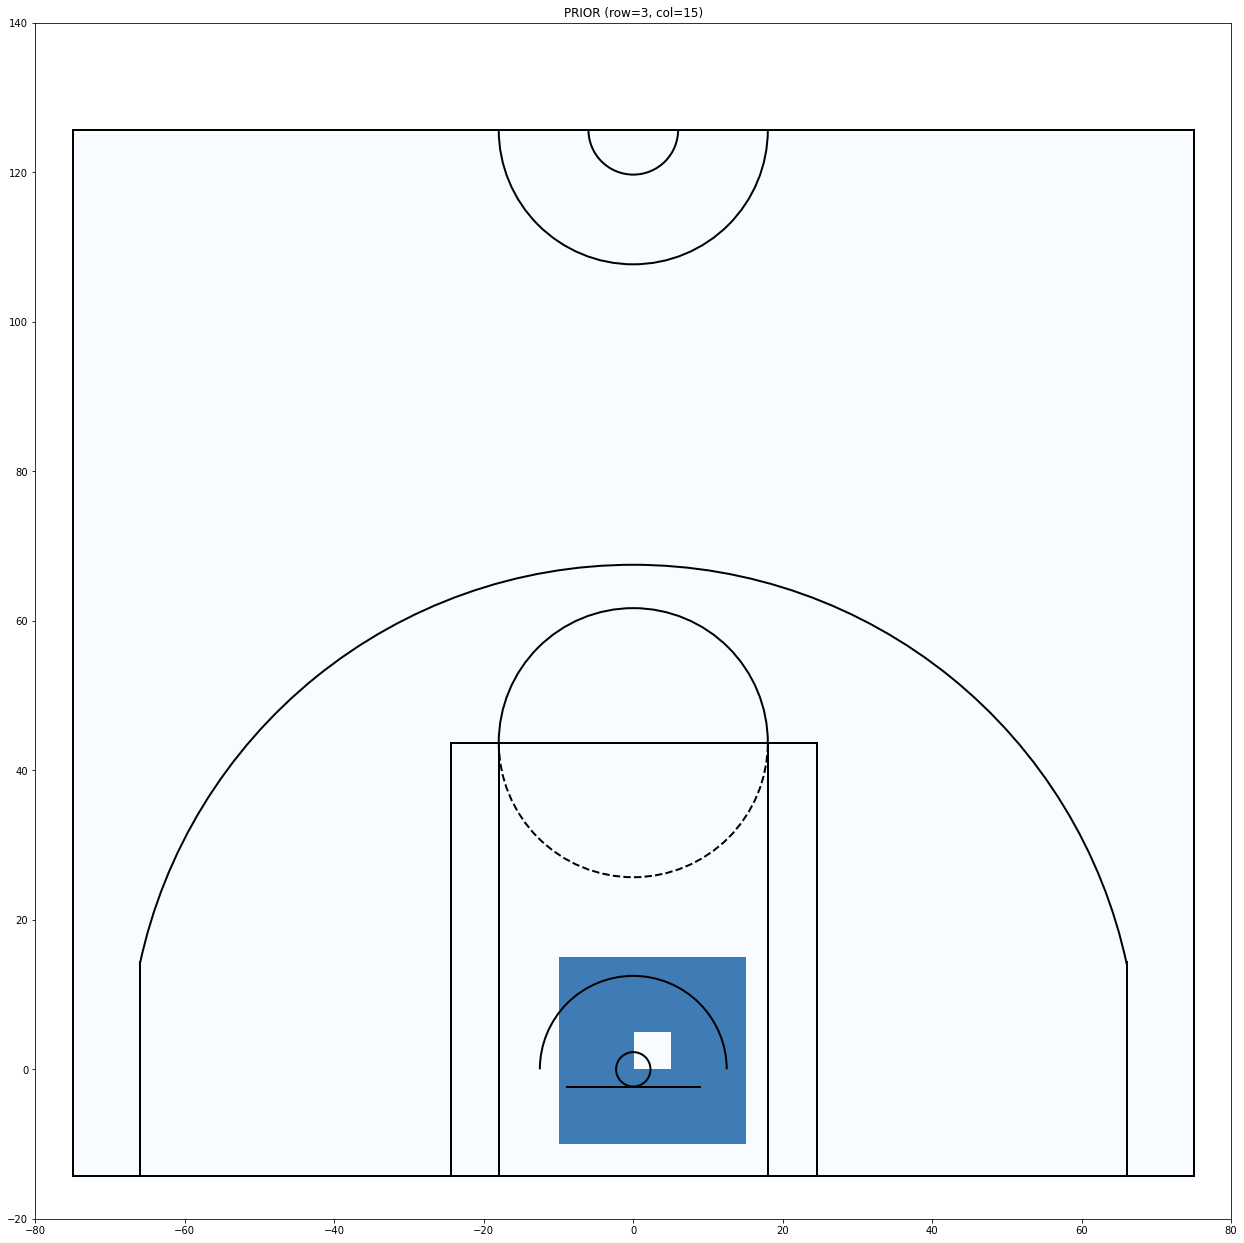

In [58]:
plt.figure(figsize=(24,22))

plt.imshow(prior_only['prior'], cmap=plt.cm.Blues, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_facecolor('#ffffff')
plt.gca().set_title('PRIOR (row={}, col={})'.format(yii, xii).format(2))
# plt.gca().set_title(title)

# plt.savefig('outputs/img/ebppa/ppa.png')
plt.savefig('outputs/img/ebppa/prior-{}-{}.png'.format(yii, xii))
plt.show()
plt.close()

In [16]:
def get_prior_mean(y, x, grid_dist, grid_pts, grid_fga, withcell=False):
    
    indices = []
    ptsi = []
    fgai = []
    
    if withcell:
        indices = get_prior_with_cell(y, x, grid_dist=grid_dist)['prior_index']
    else:
        indices = get_prior_only(y, x, grid_dist=grid_dist)['prior_index']
#     print(len(indices))
    for i in indices:
        ptsi.append(grid_pts[i[0]][i[1]])
        fgai.append(grid_fga[i[0]][i[1]])
    
    return (np.sum(ptsi)/np.sum(fgai)).round(6)

print(grid_ppa[0][2], get_prior_mean(0, 2, grid_dist, grid_pts, grid_fga, False))

def get_prior_mean_grid(grid_dist, grid_pts, grid_fga, withcell=False):
    
    grid_pm = np.empty(grid_dist.shape)
    grid_y, grid_x = grid_dist.shape
    
    for y in range(0, grid_y):
        for x in range(0, grid_x):
            grid_pm[y][x] = get_prior_mean(y, x, grid_dist, grid_pts, grid_fga, withcell)
    
    return grid_pm

0.0 0.861842


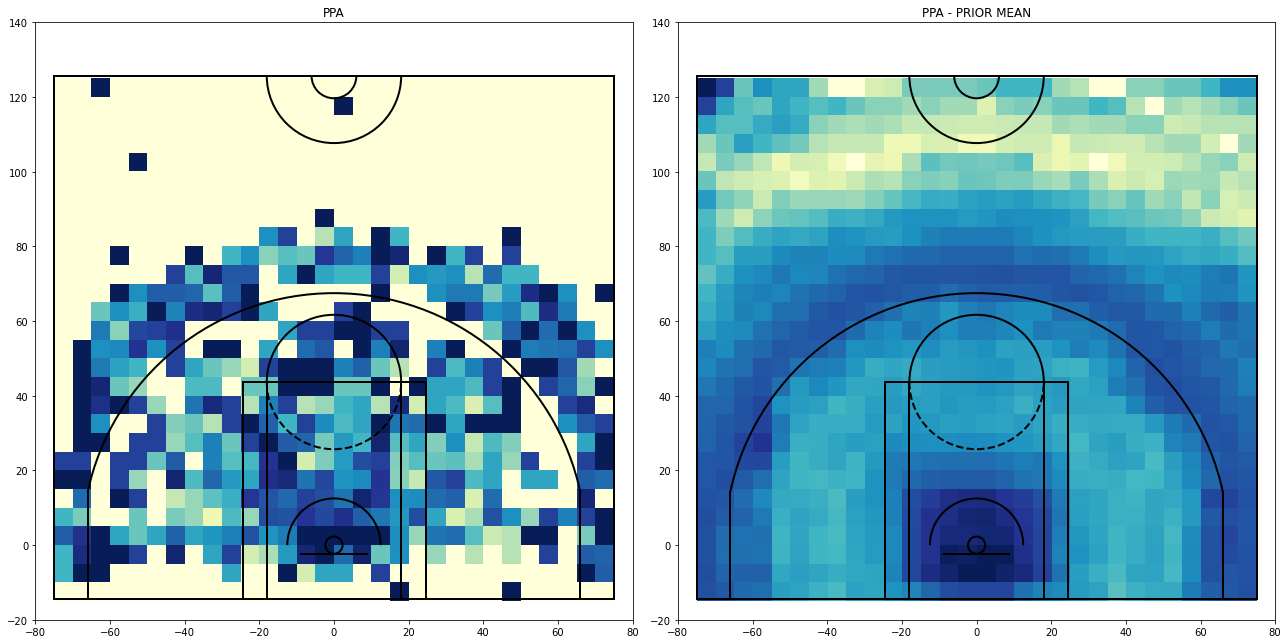

In [17]:
grid_prior_mean = get_prior_mean_grid(grid_dist, grid_pts, grid_fga, withcell=False)

fx2, axs2 = plt.subplots(1,2,figsize=(18,16))
fx2.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(grid_ppa, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(grid_prior_mean, cmap=plt.cm.YlGnBu, alpha=1.0, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA - PRIOR MEAN'.format(yi, xi).format(2))

plt.show()
plt.close()

In [18]:
def get_mean_fga(y, x, grid_dist=grid_dist, grid_fga=grid_fga, withcell=False):
    
    indices = []
    ifga = []
    
    if withcell:
        indices = get_prior_with_cell(y, x, grid_dist=grid_dist)['prior_index']
    else:
        indices = get_prior_only(y, x, grid_dist=grid_dist)['prior_index']
#     print(len(indices))
    for i in indices:
        ifga.append(grid_fga[i[0]][i[1]])
    
    return (np.sum(ifga)/len(indices)).round(6)


def get_prior_variance(y, x, grid_dist=grid_dist, grid_pts=grid_pts, grid_fga=grid_fga, grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, withcell=False):
    
    indices = []
    inum1 = []
    iden1 = []
    pmi = get_prior_mean(y, x, grid_dist, grid_pts, grid_fga, withcell=False)
    nj_mean = get_mean_fga(y, x, grid_dist, grid_fga, withcell=False)
    nn = pmi/nj_mean
    
    if withcell:
        indices = get_prior_with_cell(y, x, grid_dist=grid_dist)['prior_index']
    else:
        indices = get_prior_only(y, x, grid_dist=grid_dist)['prior_index']
    
    for i in indices:
        nj = grid_fga[i[0]][i[1]]
        rj = grid_ppa[i[0]][i[1]]
        yj = grid_prior_mean[i[0]][i[1]]
        inum1.append(nj * ((rj - yj)**2)) 
        iden1.append(nj)
        
    return ((np.sum(inum1)/np.sum(iden1)) - nn).round(6)

def get_prior_variance_grid(grid_dist=grid_dist, grid_pts=grid_pts, grid_fga=grid_fga, grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, withcell=False):
    
    grid_pvar = np.empty(grid_dist.shape)
    grid_y, grid_x = grid_dist.shape
    
    for y in range(0, grid_y):
        for x in range(0, grid_x):
            pvar = get_prior_variance(y, x, grid_dist, grid_pts, grid_fga, grid_ppa, grid_prior_mean, withcell)
#             print(pvar)
#             grid_pvar[y][x] = get_prior_variance(y, x, grid_dist, grid_pts, grid_fga, grid_ppa, grid_prior_mean, withcell)
            grid_pvar[y][x] = pvar
    
    return grid_pvar
    
get_prior_variance(0,0)

0.051567

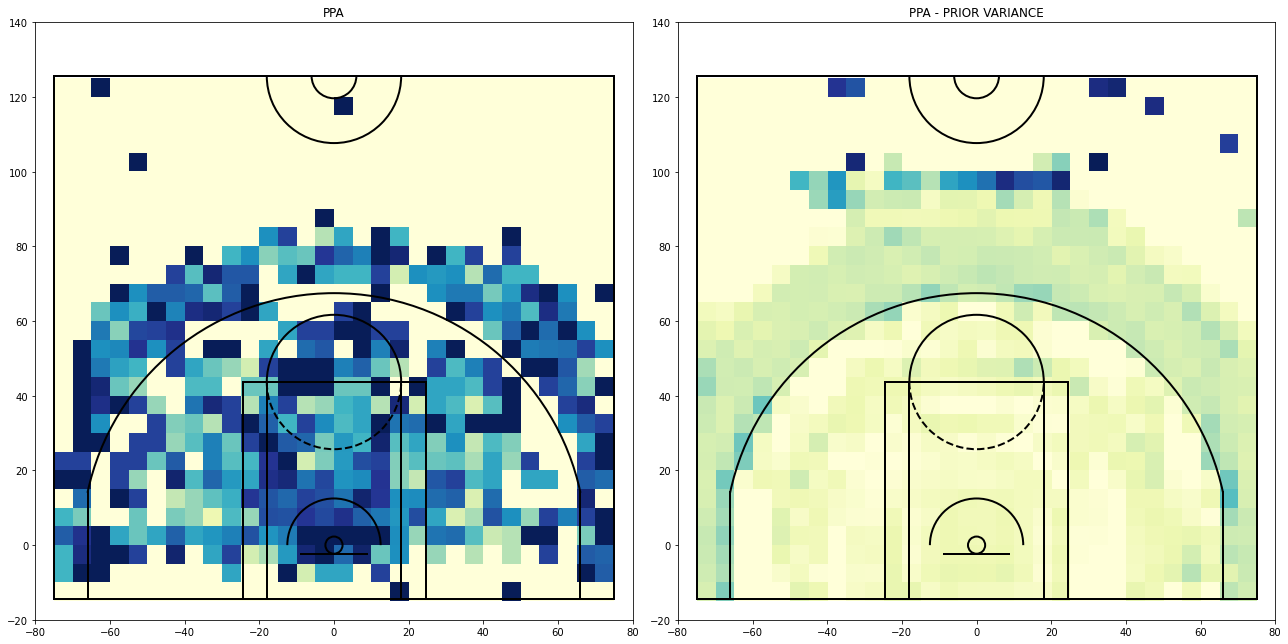

In [19]:
grid_prior_variance = get_prior_variance_grid(grid_dist=grid_dist, grid_pts=grid_pts, grid_fga=grid_fga, grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, withcell=False)

fx2, axs2 = plt.subplots(1,2,figsize=(18,16))
fx2.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(grid_ppa, cmap=plt.cm.YlGnBu, alpha=1.0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(grid_prior_variance, cmap=plt.cm.YlGnBu, alpha=1.0, vmin=0, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA - PRIOR VARIANCE'.format(yi, xi).format(2))

plt.show()
plt.close()

In [20]:
def get_shrinking(y, x, grid_fga=grid_fga, grid_prior_mean=grid_prior_mean, grid_prior_variance=grid_prior_variance):
    
    vari = grid_prior_variance[y][x]
    meani = grid_prior_mean[y][x]
    ni = grid_fga[y][x]    
    
    if vari == 0:
        return 0

    if ni == 0:
        return 0
    
    else:
        return (vari/(vari + (meani/ni))).round(6)
    

def get_shrinking_grid(grid_fga=grid_fga, grid_prior_mean=grid_prior_mean, grid_prior_variance=grid_prior_variance):
    
    grid_wi = np.empty(grid_fga.shape)
    grid_y, grid_x = grid_fga.shape
    
    for y in range(0, grid_y):
        for x in range(0, grid_x):
            wi = get_shrinking(y, x, grid_fga=grid_fga, grid_prior_mean=grid_prior_mean, grid_prior_variance=grid_prior_variance)
#             print(pvar)
#             grid_pvar[y][x] = get_prior_variance(y, x, grid_dist, grid_pts, grid_fga, grid_ppa, grid_prior_mean, withcell)
            grid_wi[y][x] = wi
    
    return grid_wi
    
get_shrinking(0,1)

0

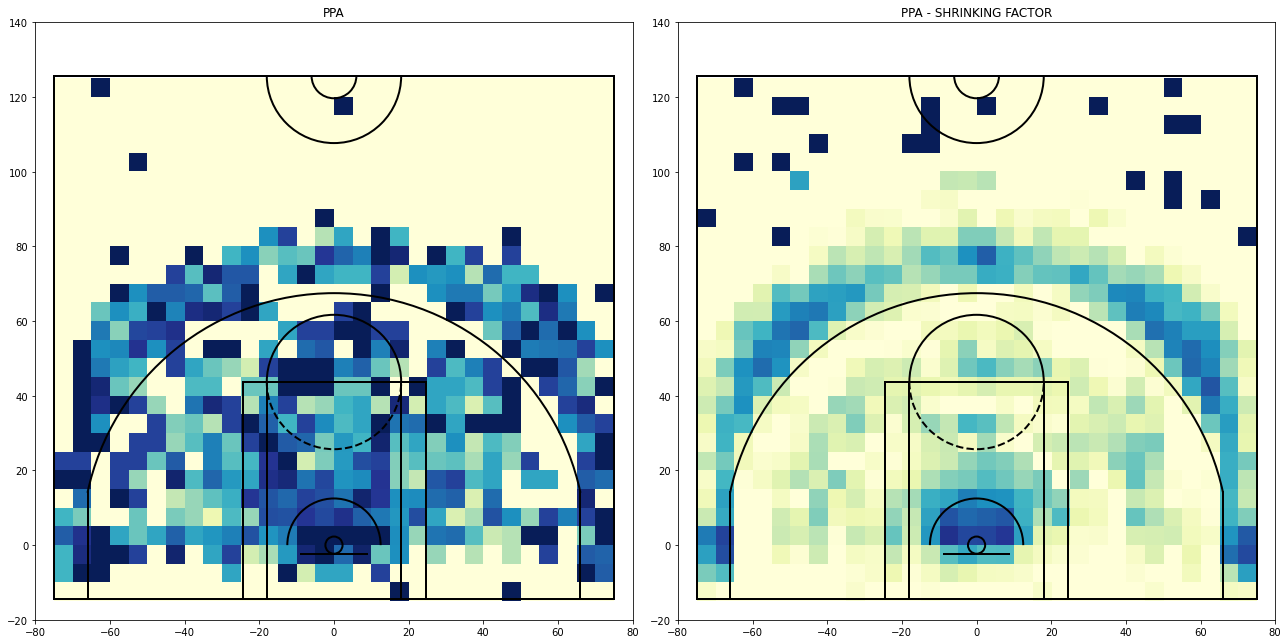

In [21]:
grid_shrinking = get_shrinking_grid(grid_fga=grid_fga, grid_prior_mean=grid_prior_mean, grid_prior_variance=grid_prior_variance)

fx3, axs3 = plt.subplots(1,2,figsize=(18,16))
fx3.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(grid_ppa, cmap=plt.cm.YlGnBu, alpha=1.0, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(grid_shrinking, cmap=plt.cm.YlGnBu, alpha=1.0, vmin=0, vmax=1, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA - SHRINKING FACTOR'.format(yi, xi).format(2))

plt.show()
plt.close()

In [22]:
def get_eb_ppa(y, x, grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, grid_shrinking=grid_shrinking):
    
    Wi = grid_shrinking[y][x]
    pi = grid_ppa[y][x]
    pmi = grid_prior_mean[y][x]
    
    ebppa = (Wi*pi) + ((1.0 - Wi)*pmi)
    return ebppa.round(6)

def get_eb_ppa_grid(grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, grid_shrinking=grid_shrinking):
    
    grid_ebppa = np.empty(grid_ppa.shape)
    grid_y, grid_x = grid_ppa.shape
    
    for y in range(0, grid_y):
        for x in range(0, grid_x):
            ebppa = get_eb_ppa(y, x, grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, grid_shrinking=grid_shrinking)
            grid_ebppa[y][x] = ebppa
    
    return grid_ebppa

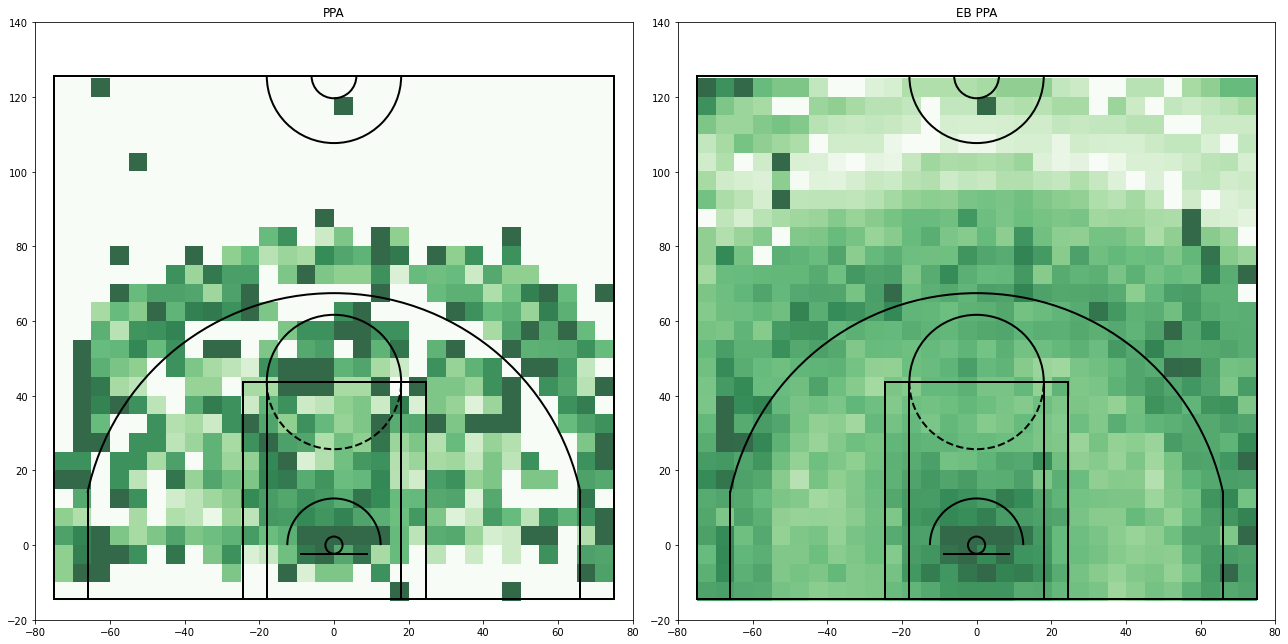

In [23]:
grid_eb_ppa = get_eb_ppa_grid(grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, grid_shrinking=grid_shrinking)

fx4, axs4 = plt.subplots(1,2,figsize=(18,16))
fx4.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(grid_ppa, cmap=plt.cm.Greens, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(grid_eb_ppa, cmap=plt.cm.Greens, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('EB PPA'.format(yi, xi).format(2))

plt.show()
plt.close()

In [24]:
df_ebppa = pd.DataFrame(grid_eb_ppa)

In [25]:
df_ebppa_noneg = df_ebppa.clip(lower=0)

df_ebppa_noneg.to_csv("outputs/data/ebppa_noneg.csv", index=False)

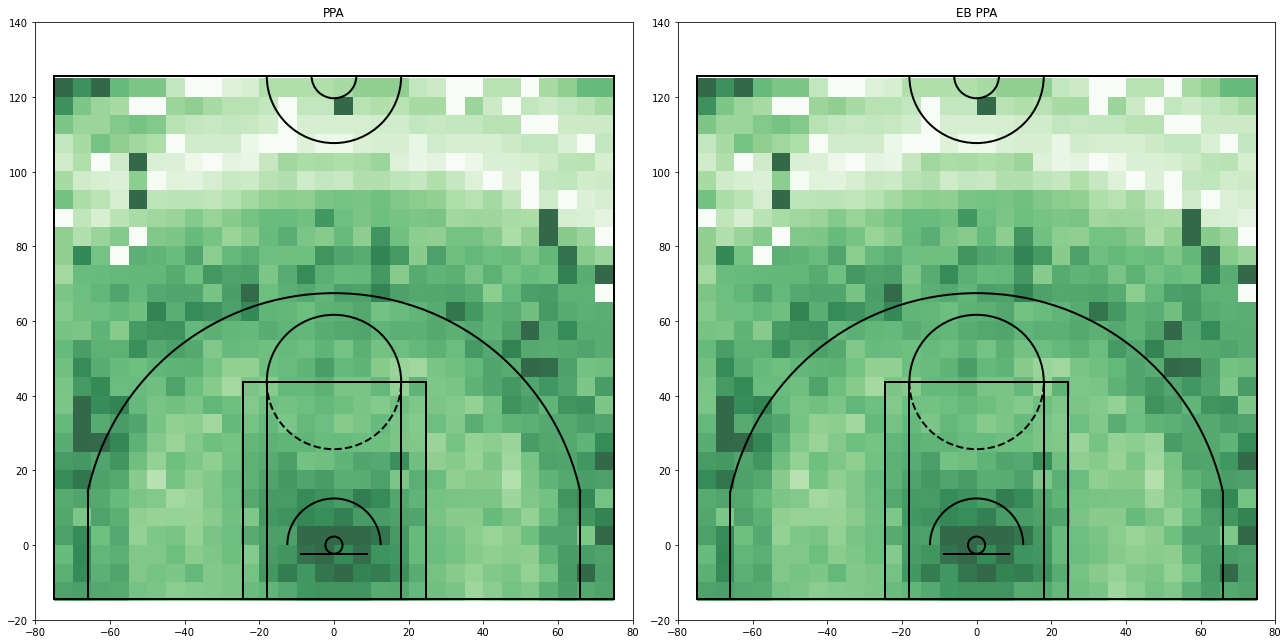

In [26]:
grid_eb_ppa_noneg = df_ebppa_noneg.to_numpy()

# grid_eb_ppa = get_eb_ppa_grid(grid_ppa=grid_ppa, grid_prior_mean=grid_prior_mean, grid_shrinking=grid_shrinking)

fx4, axs4 = plt.subplots(1,2,figsize=(18,16))
fx4.set_tight_layout(True)

plt.subplot(1,2,1)
plt.imshow(grid_eb_ppa, cmap=plt.cm.Greens, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('PPA'.format(yi, xi).format(1))

plt.subplot(1,2,2)
plt.imshow(grid_eb_ppa_noneg, cmap=plt.cm.Greens, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_title('EB PPA'.format(yi, xi).format(2))

plt.show()
plt.close()

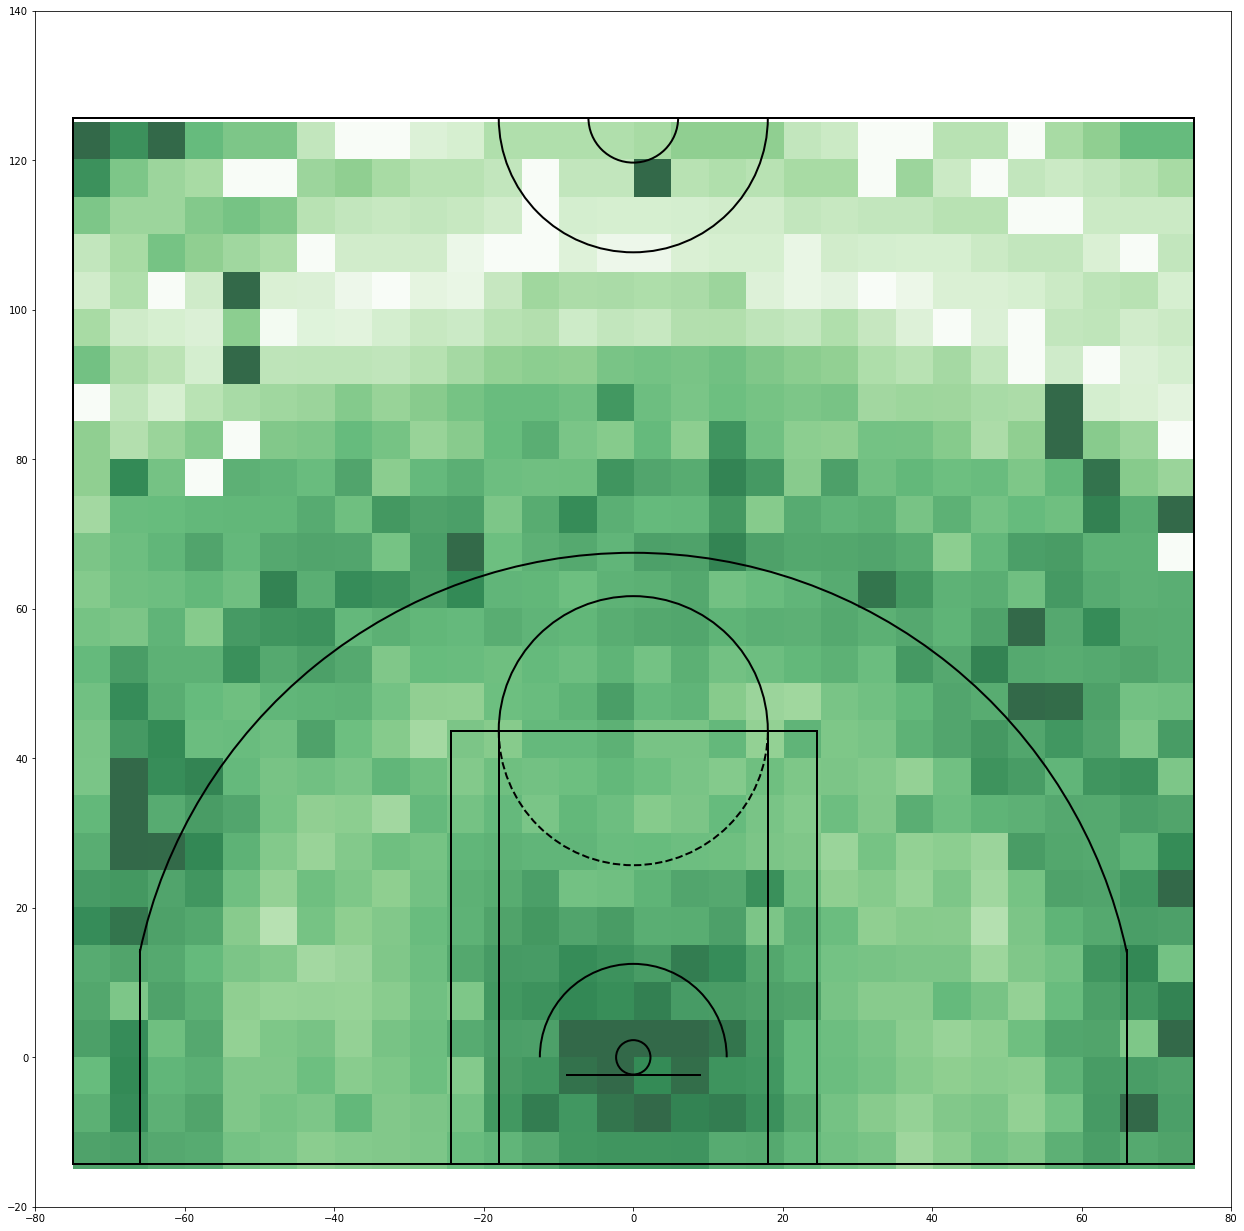

In [43]:
plt.figure(figsize=(24,22))

plt.imshow(grid_eb_ppa, cmap=plt.cm.Greens, alpha=0.8, vmin=0, vmax=1.2, interpolation='none', extent=(-75,75,-15,125), origin='lower')
draw_court(outer_lines=True)

plt.xlim(-80,80)
plt.ylim(-20, 140)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_facecolor('#ffffff')
# plt.gca().set_title(title)

# plt.savefig('outputs/img/ebppa/ppa.png')
plt.savefig('outputs/img/ebppa/eb-ppa.png')
plt.show()
plt.close()